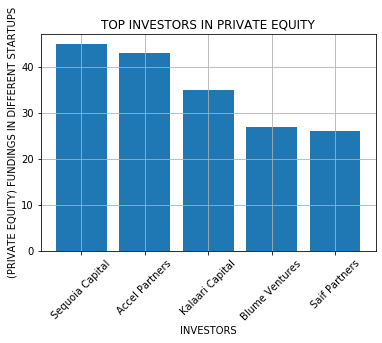

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
Saif Partners 26


In [4]:
#QUESTION-5
import pandas as pd,matplotlib.pyplot as plt,numpy as np
df=pd.read_csv("startup_funding.csv")
result={}
#To avoid the counting of funding of same investor in same startup. 
investor_startup_list=list()
df=df[["StartupName","InvestorsName","InvestmentType"]]
df.dropna(inplace=True)
arr=np.array(df)
for row in arr:
    #Counting for Investment Type(Private Equity) only.
    #Handling spelling errors of Investment Type(Private Equity).
    if row[2]=="Private Equity" or row[2]=="PrivateEquity":
        startup_name=row[0]
        #Handling spelling errors of important startups names.
        if "Paytm" in startup_name:
            startup_name="Paytm"
        elif "Flipkart" in startup_name:
            startup_name="Flipkart"
        elif ("Oyo" in startup_name or "OYO" in startup_name) and startup_name!="OYOfit":
            startup_name="Oyo"
        elif "Ola" in startup_name:
            startup_name="Ola"
        investor_list=row[1].strip().split(",")
        for i in range(len(investor_list)):
            #Handling case-sensitiveness of Investor names.
            investor_name=investor_list[i].strip().title()
            #Avoiding the count of funding of same investor in same startup.Avoiding repetetion.
            if (startup_name,investor_name) not in investor_startup_list:
                result[investor_name]=result.get(investor_name,0)+1
                investor_startup_list.append((startup_name,investor_name))
#Handling Undisclosed Investors.
del result["Undisclosed Investors"],result[""],result["Undisclosed Investor"]
#Sorting Investors(Descending Order) on Number of Investments.
sorted_result=sorted(result.items(),key=lambda x:x[1],reverse=True)
#Top 5 Investors in different Startups with Investment Type(Private Equity).
x_axis=list()
y_axis=list()
for element in sorted_result[:5]:
    x_axis.append(element[0])
    y_axis.append(element[1])
#Plotting Bar-Graph.
plt.bar(x_axis,y_axis)
plt.grid()
plt.title("TOP INVESTORS IN PRIVATE EQUITY")
plt.xlabel("INVESTORS")
plt.ylabel("(PRIVATE EQUITY) FUNDINGS IN DIFFERENT STARTUPS")
plt.xticks(rotation=45)
plt.show()
#Actual Values
for i in range(len(x_axis)):
    print(x_axis[i],y_axis[i])